# Ejemplo 7.1

Resuelva el siguiente problema de valor inicial (PVI)

$$\begin{array}
\dfrac{dy}{dx}&=&(x-y) \\
y(0)&=&2\\
y(1)&=&? 
\end{array} $$

mediante el método de Euler

In [11]:
"""
Para resolver ecuaciones diferenciales ordinarias vamos a utilizar odeint
que se encuentra en la biblioteca scipy. 

Referencia
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint

"""
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Paso 1: Colocamos en una función la EDO
# y es la variable dependiente y x la variable independiente

def PVI(y,x):    
    dydx = (x-y)
    return dydx

# Paso 2: Establecemos la condición inicial
y0 = 2   # Esto viene de y(0) = 2

# Paso 3: Establecemos el dominio de integración está dado en las condiciones 
# iniciales (x = 0) y de frontera (x = 1).
x = np.linspace(0,1)

# Paso 4: Se resuelve el PVI usando odeint, la solución se almacena en y
y = odeint(PVI,y0,x)



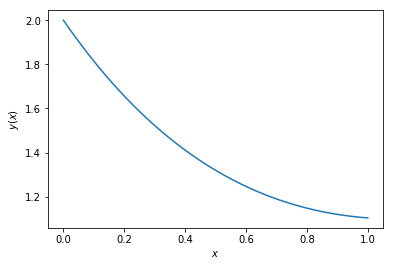

In [12]:
# Paso 5: Graficamos la solución
plt.plot(x,y)
plt.xlabel(r"$x$")
plt.ylabel(r"$y(x)$")
plt.show()

# Otro ejemplo

Considere la siguiente EDO

$$\dfrac{dy(t)}{dt} = -k\,y(t)$$

donde $k = 0.3$ es un parámetro, y la condición inicial para esta EDO es $y(0) = 5$

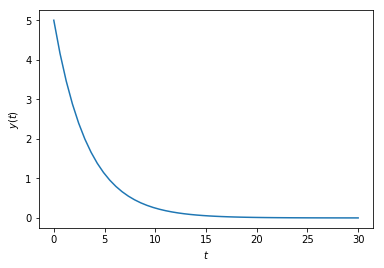

In [13]:
# Creamos una función con la EDO
def EDO(y,t):    # y es la variable dependiente y t es la independiente
    k = 0.3
    dydt = -k*y
    return dydt

# Establecemos la condición inicial
y0 = 5

# Establecemos el dominio de integración. En el problema no proporciona
# la condición de frontera, asi que uno puede establecerlo libremente
t = np.linspace(0,30)

# Se resuelve el problema
y = odeint(EDO,y0,t)

# Graficamos la solución
plt.plot(t,y)
plt.xlabel(r"$t$")
plt.ylabel(r"$y(t)$")
plt.show()    

odeint tiene la opción de enviar información adicional a la función por medio tuplas. Por ejemplo el parámentro k se puede enviar como información adicional.

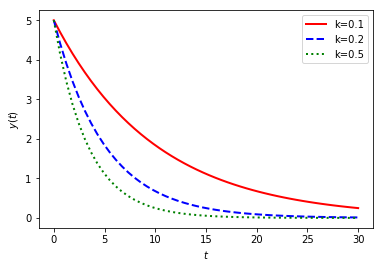

In [17]:
# Creamos una función con la EDO
def ODE(y,t,k):    # Aquí estamos indicando que k es un argumento
    return -k*y

# Establecemos la condición inicial
y0 = 5

# Establecemos el dominio de integración. En el problema no proporciona
# la condición de frontera, asi que uno puede establecerlo libremente
t = np.linspace(0,30)

# Se resuelve el problema
# Le damos valores al argumento k
k = 0.1
y1 = odeint(ODE,y0,t,args=(k,))
k = 0.2
y2 = odeint(ODE,y0,t,args=(k,))
k = 0.3
y3 = odeint(ODE,y0,t,args=(k,))

# Graficamos la solución
plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'b--',linewidth=2,label='k=0.2')
plt.plot(t,y3,'g:',linewidth=2,label='k=0.5')
plt.xlabel(r'$t$')
plt.ylabel(r'$y(t)$')
plt.legend()
plt.show()  

# Ejemplo 7.10

Resuelva el siguiente problema de valor inicial

$$\begin{array} 
y^{\prime} &=& z\\
z^{\prime} &=& -\frac{1}{x}\,z + (\frac{1}{x^2} - 1)\,y \\
y(1) &=& 1\\
z(1) &=& 2\\
y(3) &=& ?
\end{array}$$

In [29]:
"""
Para resolver sistemas ecuaciones diferenciales ordinarias vamos a 
utilizar nuevamente odeint que se encuentra en la biblioteca scipy. 
Referencia
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint
"""
# Paso 1: Colocamos en una función el sistema de EDOs
# y y z son las variables dependientes y x la variable independiente
# y = y[0] y z = y[1]

def sistema(y,x):    
    return np.array([y[1], -y[1]/x + (1/x**2 - 1)*y[0]])

# Paso 2: Establecemos la condición inicial
y0 = [1,2]  # Esto viene de y(1) = 1 y z(1) = 2

# Paso 3: Establecemos el dominio de integración está dado en las condiciones 
# iniciales (x = 1) y de frontera (x = 3).
x = np.linspace(1,3,10)

# Paso 4: Se resuelve el sistema usando odeint, la solución se almacena en y
sol= odeint(sistema,y0,x) 

In [32]:
print x, sol

[1.         1.22222222 1.44444444 1.66666667 1.88888889 2.11111111
 2.33333333 2.55555556 2.77777778 3.        ] [[ 1.          2.        ]
 [ 1.39774452  1.58828562]
 [ 1.70773201  1.20298164]
 [ 1.93250581  0.81970611]
 [ 2.07197598  0.43575822]
 [ 2.12657397  0.05729847]
 [ 2.09858233 -0.30572598]
 [ 1.99267436 -0.64204457]
 [ 1.81603694 -0.94049477]
 [ 1.57823457 -1.19097229]]


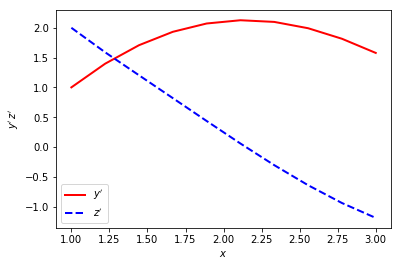

In [30]:
# Paso 5: Graficamos la solución
plt.plot(x,sol[:,0],'r-',linewidth=2,label=r'$y^{\prime}$')
plt.plot(x,sol[:,1],'b--',linewidth=2,label=r'$z^{\prime}$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y^{\prime}\,z^{\prime}$')
plt.legend()
plt.show()  